# **Default Credit Cards Clients**

A bank in you region want to build a model to predict credit card defaulters more accurately in order minimize money loss. For this task we have a set of data on default payments and demographic data to help us do our task. Data is comprised in the following CSV files:


**TRAINING**

**`train_customers.csv`**
 - `ID`: ID of each client
 - `LIMIT_BAL`: Amount of given credit in NT dollars (includes individual and family/supplementary credit
 - `SEX`: Gender (1=male, 2=female)
 - `EDUCATION`: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)
 - `MARRIAGE`: Marital status (1=married, 2=single, 3=others)
 - `AGE`: Age in years
 
**`train_series.csv`**
 - `ID`: ID of each client
 - `MONTH`: The month to wich data is refering
 - `PAY`: Repayment status in the corresponding month (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, … 8=payment delay for eight months, 9=payment delay for nine months and above)
 - `BILL_AMT`: Amount of bill statement in the corresponding month (NT dollar)
 - `PAY_AMT`: Amount of previous payment in the corresponding month (NT dollar)
 
**`train_target.csv`**
 - `DEFAULT_JULY`: Default payment in July (1=yes, 0=no)
 
 
**TEST** (For PART 3)
 - **`test_data.csv`**
 
**SUBMISSION** (For PART 3)
 - **`submission_features.csv`**
 
**BACKUP**
 - **`train_data.csv`**

Load all data and answer the following questions

## **A. DATA ENGINEERING**

In this part, we're going to prepare data for further analysis. The goal is to transform the separated files into one analytic table with one row per customer (ID).

Load the train_series.csv file and pivot the time-dependent columns (PAY, BILL_AMT, and PAY_AMT) to build one column of these per month. (Ex. PAY_JUNE, PAY_MAY, ..., BILL_AMT_JUNE, ...)

 **`train_series.csv`**
 - `ID`: ID of each client
 - `MONTH`: The month to wich data is refering
 - `PAY`: Repayment status in the corresponding month (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, … 8=payment delay for eight months, 9=payment delay for nine months and above)
 - `BILL_AMT`: Amount of bill statement in the corresponding month (NT dollar)
 - `PAY_AMT`: Amount of previous payment in the corresponding month (NT dollar)

In [449]:
import pandas as pd

In [450]:
# Load train_series.csv
train_series = pd.read_csv('train_series.csv')

In [451]:
train_series.head()

,ID,MONTH,PAY,BILL_AMT,PAY_AMT
0,15936,JUNE,1.0,0.0,797.0
1,15936,MAY,-1.0,797.0,190.0
2,15936,APRIL,-1.0,190.0,3269.0
3,15936,MARCH,-1.0,3260.0,32617.0
4,15936,FEBRUARY,-1.0,32617.0,5000.0


In [452]:
train_series.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90000 entries, 0 to 89999
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   ID        90000 non-null  int64  
 1   MONTH     90000 non-null  object 
 2   PAY       90000 non-null  float64
 3   BILL_AMT  90000 non-null  float64
 4   PAY_AMT   90000 non-null  float64
dtypes: float64(3), int64(1), object(1)
memory usage: 3.4+ MB


In [453]:
# Pivot the data to create columns for each month
pivoted_data = train_series.pivot_table(index='ID', columns='MONTH', 
                                        values=['PAY', 'BILL_AMT', 'PAY_AMT'], 
                                        aggfunc='first')

In [454]:
# Flatten the multi-level column index
pivoted_data.columns = [f'{col[0]}_{col[1]}' for col in pivoted_data.columns]

In [455]:
# Reset the index to have 'ID' as a regular column
pivoted_data.reset_index(inplace=True)

In [456]:
# Rename the columns to match the desired format (PAY_JANUARY, PAY_FEBRUARY, etc.)
pivoted_data.rename(columns={
    'PAY_JAN': 'PAY_JANUARY', 'PAY_FEB': 'PAY_FEBRUARY', 'PAY_MAR': 'PAY_MARCH',
    'PAY_APR': 'PAY_APRIL', 'PAY_MAY': 'PAY_MAY', 'PAY_JUN': 'PAY_JUNE',
    'BILL_AMT_JAN': 'BILL_AMT_JANUARY', 'BILL_AMT_FEB': 'BILL_AMT_FEBRUARY',
    'BILL_AMT_MAR': 'BILL_AMT_MARCH', 'BILL_AMT_APR': 'BILL_AMT_APRIL',
    'BILL_AMT_MAY': 'BILL_AMT_MAY', 'BILL_AMT_JUN': 'BILL_AMT_JUNE',
    'PAY_AMT_JAN': 'PAY_AMT_JANUARY', 'PAY_AMT_FEB': 'PAY_AMT_FEBRUARY',
    'PAY_AMT_MAR': 'PAY_AMT_MARCH', 'PAY_AMT_APR': 'PAY_AMT_APRIL',
    'PAY_AMT_MAY': 'PAY_AMT_MAY', 'PAY_AMT_JUN': 'PAY_AMT_JUNE'
}, inplace=True)

In [457]:
pivoted_data.head()

,ID,BILL_AMT_APRIL,BILL_AMT_FEBRUARY,BILL_AMT_JANUARY,BILL_AMT_JUNE,BILL_AMT_MARCH,BILL_AMT_MAY,PAY_APRIL,PAY_FEBRUARY,PAY_JANUARY,PAY_JUNE,PAY_MARCH,PAY_MAY,PAY_AMT_APRIL,PAY_AMT_FEBRUARY,PAY_AMT_JANUARY,PAY_AMT_JUNE,PAY_AMT_MARCH,PAY_AMT_MAY
0,0,13600.0,44024.0,18697.0,28991.0,0.0,24391.0,0.0,-1.0,0.0,-1.0,0.0,0.0,0.0,680.0,10000.0,1300.0,22373.0,1000.0
1,1,53169.0,50372.0,49470.0,75662.0,50875.0,70073.0,0.0,0.0,0.0,0.0,0.0,0.0,2000.0,1903.0,2006.0,3212.0,1603.0,2106.0
2,3,0.0,0.0,0.0,23570.0,0.0,735.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,0.0,0.0,0.0,742.0,0.0,0.0
3,4,9044.0,9417.0,9617.0,8214.0,9225.0,8034.0,0.0,0.0,0.0,0.0,0.0,0.0,331.0,356.0,330.0,1140.0,341.0,1150.0
4,5,44412.0,35704.0,36524.0,50840.0,45402.0,49592.0,0.0,0.0,0.0,0.0,0.0,0.0,1837.0,1254.0,1387.0,2100.0,1139.0,1847.0


In [458]:
pivoted_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 15000 non-null  int64  
 1   BILL_AMT_APRIL     15000 non-null  float64
 2   BILL_AMT_FEBRUARY  15000 non-null  float64
 3   BILL_AMT_JANUARY   15000 non-null  float64
 4   BILL_AMT_JUNE      15000 non-null  float64
 5   BILL_AMT_MARCH     15000 non-null  float64
 6   BILL_AMT_MAY       15000 non-null  float64
 7   PAY_APRIL          15000 non-null  float64
 8   PAY_FEBRUARY       15000 non-null  float64
 9   PAY_JANUARY        15000 non-null  float64
 10  PAY_JUNE           15000 non-null  float64
 11  PAY_MARCH          15000 non-null  float64
 12  PAY_MAY            15000 non-null  float64
 13  PAY_AMT_APRIL      15000 non-null  float64
 14  PAY_AMT_FEBRUARY   15000 non-null  float64
 15  PAY_AMT_JANUARY    15000 non-null  float64
 16  PAY_AMT_JUNE       150

Load train_customers.csv and include the pivoted table of time series data. The resulting table must be a table with one row per customer (ID)

**`train_customers.csv`**
 - `ID`: ID of each client
 - `LIMIT_BAL`: Amount of given credit in NT dollars (includes individual and family/supplementary credit
 - `SEX`: Gender (1=male, 2=female)
 - `EDUCATION`: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)
 - `MARRIAGE`: Marital status (1=married, 2=single, 3=others)
 - `AGE`: Age in years

In [459]:
# Load train_customers.csv
train_customers = pd.read_csv('train_customers.csv')

In [460]:
train_customers.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE
0,15936,140000.0,2,1,1,39
1,15248,90000.0,2,2,1,49
2,27163,150000.0,2,1,1,37
3,13955,160000.0,1,3,1,38
4,23604,360000.0,1,2,1,28


In [461]:
train_customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         15000 non-null  int64  
 1   LIMIT_BAL  15000 non-null  float64
 2   SEX        15000 non-null  int64  
 3   EDUCATION  15000 non-null  int64  
 4   MARRIAGE   15000 non-null  int64  
 5   AGE        15000 non-null  int64  
dtypes: float64(1), int64(5)
memory usage: 703.2 KB


In [462]:
# Merge with the pivoted time series data
merged_data = pd.merge(train_customers, pivoted_data, on='ID', how='left')

In [463]:
# Flatten the column index
merged_data.columns = ['{}_{}'.format(col[0], col[1]) if isinstance(col, tuple) else col for col in merged_data.columns]

In [464]:
# Display the merged data
merged_data.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,BILL_AMT_APRIL,BILL_AMT_FEBRUARY,BILL_AMT_JANUARY,BILL_AMT_JUNE,...,PAY_JANUARY,PAY_JUNE,PAY_MARCH,PAY_MAY,PAY_AMT_APRIL,PAY_AMT_FEBRUARY,PAY_AMT_JANUARY,PAY_AMT_JUNE,PAY_AMT_MARCH,PAY_AMT_MAY
0,15936,140000.0,2,1,1,39,190.0,32617.0,20506.0,0.0,...,0.0,1.0,-1.0,-1.0,3269.0,5000.0,2774.0,797.0,32617.0,190.0
1,15248,90000.0,2,2,1,49,0.0,2452.0,6990.0,0.0,...,-1.0,1.0,-1.0,-2.0,2146.0,6990.0,3550.0,0.0,2452.0,0.0
2,27163,150000.0,2,1,1,37,344.0,1193.0,1914.0,4787.0,...,-1.0,-1.0,0.0,-1.0,1193.0,3000.0,0.0,1054.0,0.0,344.0
3,13955,160000.0,1,3,1,38,24994.0,9333.0,7083.0,25003.0,...,0.0,0.0,0.0,0.0,5000.0,0.0,0.0,2000.0,1500.0,5060.0
4,23604,360000.0,1,2,1,28,2500.0,0.0,0.0,0.0,...,-2.0,-2.0,2.0,-1.0,0.0,0.0,0.0,2500.0,0.0,0.0


In [465]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15000 entries, 0 to 14999
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 15000 non-null  int64  
 1   LIMIT_BAL          15000 non-null  float64
 2   SEX                15000 non-null  int64  
 3   EDUCATION          15000 non-null  int64  
 4   MARRIAGE           15000 non-null  int64  
 5   AGE                15000 non-null  int64  
 6   BILL_AMT_APRIL     15000 non-null  float64
 7   BILL_AMT_FEBRUARY  15000 non-null  float64
 8   BILL_AMT_JANUARY   15000 non-null  float64
 9   BILL_AMT_JUNE      15000 non-null  float64
 10  BILL_AMT_MARCH     15000 non-null  float64
 11  BILL_AMT_MAY       15000 non-null  float64
 12  PAY_APRIL          15000 non-null  float64
 13  PAY_FEBRUARY       15000 non-null  float64
 14  PAY_JANUARY        15000 non-null  float64
 15  PAY_JUNE           15000 non-null  float64
 16  PAY_MARCH          150

Include information from the target (train_target.csv) on the table

**`train_target.csv`**
 - `DEFAULT_JULY`: Default payment in July (1=yes, 0=no)

In [466]:
# Load train_target.csv
train_target = pd.read_csv('train_target.csv')

In [467]:
train_target.head()

,ID,DEFAULT_JULY
0,15936,0
1,15248,1
2,27163,0
3,13955,0
4,23604,0


In [468]:
train_target.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   ID            15000 non-null  int64
 1   DEFAULT_JULY  15000 non-null  int64
dtypes: int64(2)
memory usage: 234.5 KB


In [469]:
# Merge with the merged_data
final_data = pd.merge(merged_data, train_target, on='ID', how='left')

In [470]:
# Display the final merged data
final_data.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,BILL_AMT_APRIL,BILL_AMT_FEBRUARY,BILL_AMT_JANUARY,BILL_AMT_JUNE,...,PAY_JUNE,PAY_MARCH,PAY_MAY,PAY_AMT_APRIL,PAY_AMT_FEBRUARY,PAY_AMT_JANUARY,PAY_AMT_JUNE,PAY_AMT_MARCH,PAY_AMT_MAY,DEFAULT_JULY
0,15936,140000.0,2,1,1,39,190.0,32617.0,20506.0,0.0,...,1.0,-1.0,-1.0,3269.0,5000.0,2774.0,797.0,32617.0,190.0,0
1,15248,90000.0,2,2,1,49,0.0,2452.0,6990.0,0.0,...,1.0,-1.0,-2.0,2146.0,6990.0,3550.0,0.0,2452.0,0.0,1
2,27163,150000.0,2,1,1,37,344.0,1193.0,1914.0,4787.0,...,-1.0,0.0,-1.0,1193.0,3000.0,0.0,1054.0,0.0,344.0,0
3,13955,160000.0,1,3,1,38,24994.0,9333.0,7083.0,25003.0,...,0.0,0.0,0.0,5000.0,0.0,0.0,2000.0,1500.0,5060.0,0
4,23604,360000.0,1,2,1,28,2500.0,0.0,0.0,0.0,...,-2.0,2.0,-1.0,0.0,0.0,0.0,2500.0,0.0,0.0,0


In [471]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15000 entries, 0 to 14999
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 15000 non-null  int64  
 1   LIMIT_BAL          15000 non-null  float64
 2   SEX                15000 non-null  int64  
 3   EDUCATION          15000 non-null  int64  
 4   MARRIAGE           15000 non-null  int64  
 5   AGE                15000 non-null  int64  
 6   BILL_AMT_APRIL     15000 non-null  float64
 7   BILL_AMT_FEBRUARY  15000 non-null  float64
 8   BILL_AMT_JANUARY   15000 non-null  float64
 9   BILL_AMT_JUNE      15000 non-null  float64
 10  BILL_AMT_MARCH     15000 non-null  float64
 11  BILL_AMT_MAY       15000 non-null  float64
 12  PAY_APRIL          15000 non-null  float64
 13  PAY_FEBRUARY       15000 non-null  float64
 14  PAY_JANUARY        15000 non-null  float64
 15  PAY_JUNE           15000 non-null  float64
 16  PAY_MARCH          150

In [472]:
# Save the resulting CSV
final_data.to_csv('<García de Parada><Ignacio>_A_train.csv', index=False)

## **B. EXPLORATORY DATA ANALYSIS**

Let's do some exploratory data analysis over the training data obtained from the previous part.

BAR PLOT: Plot the distribution of defaulters given the Education. Comment the results.

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

In [26]:
# Combine categories 5 and 6 into one category (5). This is due to the fact we don`t know the difference between each other. Both are Unknown.
final_data['EDUCATION'] = final_data['EDUCATION'].replace(6, 5)

In [27]:
# Labels for the education categories
education_labels = ['Graduate School', 'University', 'High School', 'Others', 'Unknown']

In [28]:
# Count defaulters by education category
defaulters_by_education = final_data[final_data['DEFAULT_JULY'] == 1].groupby('EDUCATION').size()

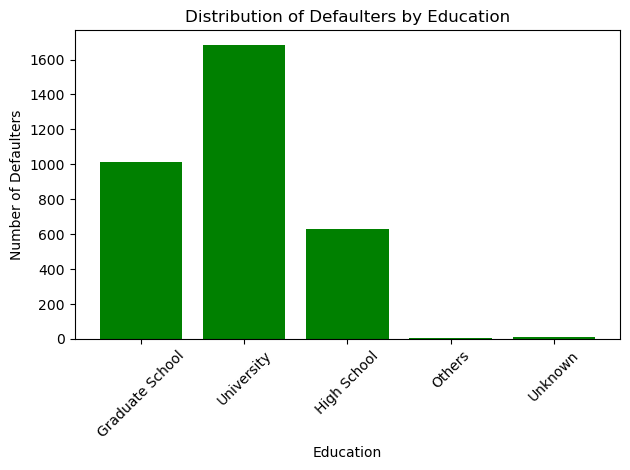

In [29]:
# Plotting the bar chart
plt.bar(range(len(education_labels)), defaulters_by_education, color='green')
plt.xlabel('Education')
plt.ylabel('Number of Defaulters')
plt.title('Distribution of Defaulters by Education')
plt.xticks(range(len(education_labels)), education_labels, rotation=45)
plt.tight_layout()
plt.show()

#### Comment on the results
As we know:  `EDUCATION`: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)


Based on the distribution of defaulters by education presented in the bar chart:

1. **Graduate School:**
   The number of defaulters from the "Graduate School" category is substantial (approximately 1000 defaulters). This could suggest that individuals with a graduate-level education might face challenges in managing their credit card payments, possibly due to financial constraints or other factors.

2. **University:**
   The highest number of defaulters is from the "University" category, with approximately 1600 defaulters. This might indicate that a larger proportion of individuals with university-level education struggle with credit card payments, which could be due to various reasons such as student loans, entry-level job positions, or financial management issues.

3. **High School:**
   The "High School" category has a lower number of defaulters compared to graduate and university levels, with approximately 600 defaulters. This might suggest that individuals with a high school education tend to have relatively better credit card payment management, possibly due to lower financial commitments or better financial literacy.

4. **Others & Unknown:**
   It's noteworthy that the "Others," "Unknown," and "Unknown" categories show very few or no defaulters. This could be due to a smaller sample size, misclassification, or genuinely low default rates in these categories.

In [30]:
final_data.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,BILL_AMT_APRIL,BILL_AMT_FEBRUARY,BILL_AMT_JANUARY,BILL_AMT_JUNE,...,PAY_JUNE,PAY_MARCH,PAY_MAY,PAY_AMT_APRIL,PAY_AMT_FEBRUARY,PAY_AMT_JANUARY,PAY_AMT_JUNE,PAY_AMT_MARCH,PAY_AMT_MAY,DEFAULT_JULY
0,15936,140000.0,2,1,1,39,190.0,32617.0,20506.0,0.0,...,1.0,-1.0,-1.0,3269.0,5000.0,2774.0,797.0,32617.0,190.0,0
1,15248,90000.0,2,2,1,49,0.0,2452.0,6990.0,0.0,...,1.0,-1.0,-2.0,2146.0,6990.0,3550.0,0.0,2452.0,0.0,1
2,27163,150000.0,2,1,1,37,344.0,1193.0,1914.0,4787.0,...,-1.0,0.0,-1.0,1193.0,3000.0,0.0,1054.0,0.0,344.0,0
3,13955,160000.0,1,3,1,38,24994.0,9333.0,7083.0,25003.0,...,0.0,0.0,0.0,5000.0,0.0,0.0,2000.0,1500.0,5060.0,0
4,23604,360000.0,1,2,1,28,2500.0,0.0,0.0,0.0,...,-2.0,2.0,-1.0,0.0,0.0,0.0,2500.0,0.0,0.0,0


In [31]:
# Map original EDUCATION codes to corresponding labels
education_labels = {
    1: 'Graduate School',
    2: 'University',
    3: 'High School',
    4: 'Others',
    5: 'Unknown'
}

In [32]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15000 entries, 0 to 14999
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 15000 non-null  int64  
 1   LIMIT_BAL          15000 non-null  float64
 2   SEX                15000 non-null  int64  
 3   EDUCATION          15000 non-null  int64  
 4   MARRIAGE           15000 non-null  int64  
 5   AGE                15000 non-null  int64  
 6   BILL_AMT_APRIL     15000 non-null  float64
 7   BILL_AMT_FEBRUARY  15000 non-null  float64
 8   BILL_AMT_JANUARY   15000 non-null  float64
 9   BILL_AMT_JUNE      15000 non-null  float64
 10  BILL_AMT_MARCH     15000 non-null  float64
 11  BILL_AMT_MAY       15000 non-null  float64
 12  PAY_APRIL          15000 non-null  float64
 13  PAY_FEBRUARY       15000 non-null  float64
 14  PAY_JANUARY        15000 non-null  float64
 15  PAY_JUNE           15000 non-null  float64
 16  PAY_MARCH          150

- The EDUCATION column is gonna be changed to 5 different dummy tables through the use of OHE. This way we will ensure that the data is in a suitable format for machine learning algorithms and enabling accurate and meaningful model training and predictions.
- The SEX column, as is binary, is gonna be changed to 0s and 1s also, to unify the model and so, make it more readable.

In [33]:
# Replace EDUCATION codes with labels
final_data['EDUCATION'] = final_data['EDUCATION'].replace(education_labels)

In [34]:
# Create dummy columns for education categories
education_dummies = pd.get_dummies(final_data['EDUCATION'], prefix='ED', drop_first=False)

In [35]:
# Rename the dummy columns to match the desired labels
education_dummies = education_dummies.rename(columns=education_labels)

In [36]:
# Concatenate the dummy columns with the original dataframe
final_data = pd.concat([final_data, education_dummies], axis=1)

In [37]:
# Concatenate the dummy columns with the original dataframe
final_data.drop('ED_0', axis=1, inplace=True)

In [38]:
# Replace SEX codes with binary values
final_data['SEX'] = final_data['SEX'].apply(lambda x: 1 if x == 1 else 0)

In [39]:
# Rename the column to indicate the values (1=male, 0=female)
final_data = final_data.rename(columns={'SEX': 'SEX_Male'})
final_data['SEX_Male'] = final_data['SEX_Male'].astype('uint8')

Finally, there will be created a new column named age_range, to check in a more globally way the relations between features.

In [40]:
# Define the bin edges for the age ranges
bin_edges = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]

In [41]:
# Define the labels for the age ranges
age_labels = ['0-9', '10-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80-89', '90-100']

In [42]:
# Create the 'AGE_RANGE' column
final_data['AGE_RANGE'] = pd.cut(final_data['AGE'], bins=bin_edges, labels=age_labels, include_lowest=True)

In [43]:
# Display the updated DataFrame
final_data.head(100)

,ID,LIMIT_BAL,SEX_Male,EDUCATION,MARRIAGE,AGE,BILL_AMT_APRIL,BILL_AMT_FEBRUARY,BILL_AMT_JANUARY,BILL_AMT_JUNE,...,PAY_AMT_JUNE,PAY_AMT_MARCH,PAY_AMT_MAY,DEFAULT_JULY,ED_Graduate School,ED_High School,ED_Others,ED_University,ED_Unknown,AGE_RANGE
0,15936,140000.0,0,Graduate School,1,39,190.0,32617.0,20506.0,0.0,...,797.0,32617.0,190.0,0,1,0,0,0,0,30-39
1,15248,90000.0,0,University,1,49,0.0,2452.0,6990.0,0.0,...,0.0,2452.0,0.0,1,0,0,0,1,0,40-49
2,27163,150000.0,0,Graduate School,1,37,344.0,1193.0,1914.0,4787.0,...,1054.0,0.0,344.0,0,1,0,0,0,0,30-39
3,13955,160000.0,1,High School,1,38,24994.0,9333.0,7083.0,25003.0,...,2000.0,1500.0,5060.0,0,0,1,0,0,0,30-39
4,23604,360000.0,1,University,1,28,2500.0,0.0,0.0,0.0,...,2500.0,0.0,0.0,0,0,0,0,1,0,20-29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,8468,200000.0,0,University,1,27,5865.0,4579.0,1107.0,14753.0,...,3670.0,4579.0,5865.0,0,0,0,0,1,0,20-29
96,24935,50000.0,0,Unknown,1,33,39702.0,40000.0,0.0,43268.0,...,2011.0,800.0,2000.0,0,0,0,0,0,1,30-39
97,29472,310000.0,0,University,1,44,0.0,0.0,0.0,500.0,...,0.0,0.0,0.0,0,0,0,0,1,0,40-49
98,21484,300000.0,0,Graduate School,2,32,-3.0,0.0,0.0,-3.0,...,0.0,0.0,0.0,0,1,0,0,0,0,30-39


In [44]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15000 entries, 0 to 14999
Data columns (total 31 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   ID                  15000 non-null  int64   
 1   LIMIT_BAL           15000 non-null  float64 
 2   SEX_Male            15000 non-null  uint8   
 3   EDUCATION           15000 non-null  object  
 4   MARRIAGE            15000 non-null  int64   
 5   AGE                 15000 non-null  int64   
 6   BILL_AMT_APRIL      15000 non-null  float64 
 7   BILL_AMT_FEBRUARY   15000 non-null  float64 
 8   BILL_AMT_JANUARY    15000 non-null  float64 
 9   BILL_AMT_JUNE       15000 non-null  float64 
 10  BILL_AMT_MARCH      15000 non-null  float64 
 11  BILL_AMT_MAY        15000 non-null  float64 
 12  PAY_APRIL           15000 non-null  float64 
 13  PAY_FEBRUARY        15000 non-null  float64 
 14  PAY_JANUARY         15000 non-null  float64 
 15  PAY_JUNE            15000 non-null  

In [45]:
# Save the resulting CSV
final_data.to_csv('<García de Parada><Ignacio>_A_train.csv', index=False)

X PLOT - Plot the distribution of `LIMIT_BAL` per defaulters and non-defaulters. Comment the results.

In [46]:
import matplotlib.pyplot as plt

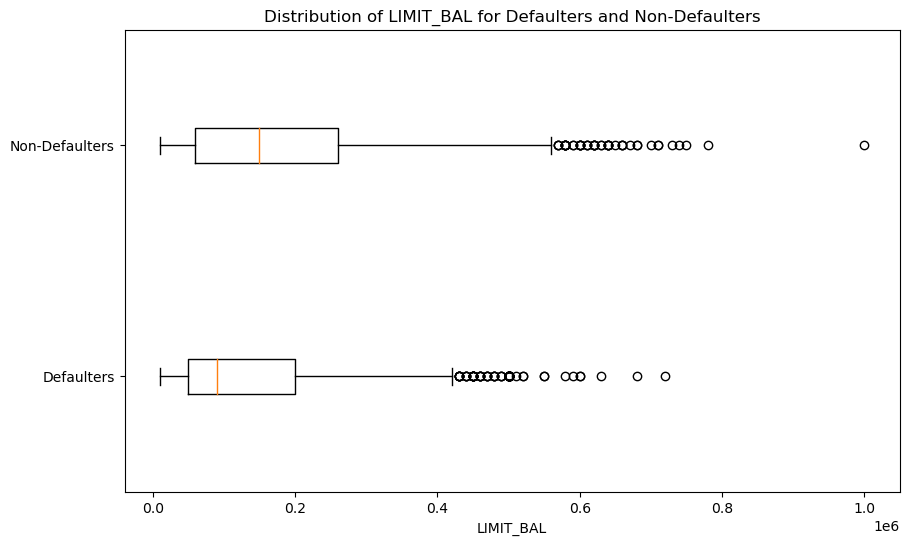

In [47]:
# Plotting the box plot for distribution of `LIMIT_BAL` for defaulters and non-defaulters
plt.figure(figsize=(10, 6))
plt.boxplot([final_data[final_data['DEFAULT_JULY'] == 1]['LIMIT_BAL'], 
             final_data[final_data['DEFAULT_JULY'] == 0]['LIMIT_BAL']], 
            labels=['Defaulters', 'Non-Defaulters'], vert=False)
plt.xlabel('LIMIT_BAL')
plt.title('Distribution of LIMIT_BAL for Defaulters and Non-Defaulters')
plt.show()

#### Comment on the results
As we know `LIMIT_BAL`: Amount of given credit in NT dollars (includes individual and family/supplementary credit

- The mean LIMIT_BAL for non-defaulters is higher than that for defaulters, suggesting that those who do not default tend to have higher credit limits.
- Both groups (defaulters and non-defaulters) display a wide spread of credit limits, indicated by the IQR and the presence of outliers.
- Non-defaulters exhibit a broader distribution of LIMIT_BAL compared to defaulters, as evident from the wider IQR range.
- The presence of outliers in both groups indicates the presence of individuals with significantly higher credit limits beyond the general distribution, potentially signifying different customer segments with distinct financial behaviors.

### Insight 1: Age Range Distribution of Defaulters Non-Defaulters:

In [48]:
# Group by AGE_RANGE and count the number of defaulters and non-defaulters
defaulters_by_age_range = final_data[final_data['DEFAULT_JULY'] == 1].groupby('AGE_RANGE').size()
non_defaulters_by_age_range = final_data[final_data['DEFAULT_JULY'] == 0].groupby('AGE_RANGE').size()

In [49]:
# Filter age ranges with non-zero individuals
non_zero_age_ranges = defaulters_by_age_range.index[defaulters_by_age_range + non_defaulters_by_age_range > 0]
defaulters_by_age_range = defaulters_by_age_range[non_zero_age_ranges]
non_defaulters_by_age_range = non_defaulters_by_age_range[non_zero_age_ranges]

In [50]:
# Convert the categorical age range labels to numerical positions
age_range_positions = range(len(defaulters_by_age_range))

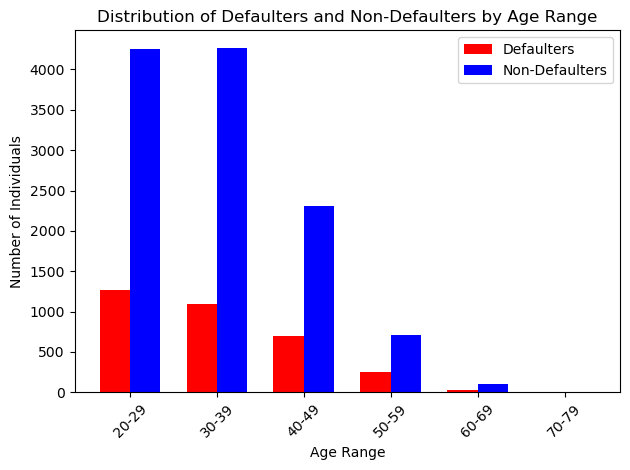

In [51]:
# Define the width of the bars
bar_width = 0.35

# Plotting the bar chart
plt.bar(age_range_positions, defaulters_by_age_range, width=bar_width, label='Defaulters', color='red')
plt.bar([pos + bar_width for pos in age_range_positions], non_defaulters_by_age_range, width=bar_width, label='Non-Defaulters', color='blue')
plt.xlabel('Age Range')
plt.ylabel('Number of Individuals')
plt.title('Distribution of Defaulters and Non-Defaulters by Age Range')
plt.xticks([pos + bar_width/2 for pos in age_range_positions], defaulters_by_age_range.index, rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

1. The highest number of defaulters falls in the age range of 20-29, followed by 30-39 and 40-49.
   There's a notable decrease in the number of defaulters as age increases beyond 50.
2. Insights:
- Youthful Defaulters (20-29 years):
- The high number of defaulters in this age range suggests that younger individuals may face challenges in managing their credit and payments effectively. This could be due to various factors like financial independence, limited experience, and education level.
- Early Working Years (30-39 years):
  Defaulters in this age range might be individuals starting their careers, possibly facing financial pressures such as housing loans, family responsibilities, and other financial commitments. Financial literacy and planning become crucial in managing these obligations effectively.
- Middle-Aged Defaulters (40-49 years):
  The number of defaulters decreases compared to the previous age range. These individuals might have greater financial stability due to established careers and decreased financial burdens such as education loans. However, unexpected events or economic downturns can still lead to defaults.
- Older Age Groups (50-79 years):
  Defaulters further decrease in these age ranges, indicating that financial stability and responsibility tend to improve as individuals progress into their later years. They may have fewer financial obligations, better financial planning, and savings, reducing the likelihood of default.

### Insight 2: Distribution of Defaulters by Gender

In [52]:
import seaborn as sns
import matplotlib.pyplot as plt

In [53]:
# Count defaulters by gender
defaulters_count_by_gender = final_data['SEX_Male'].value_counts()

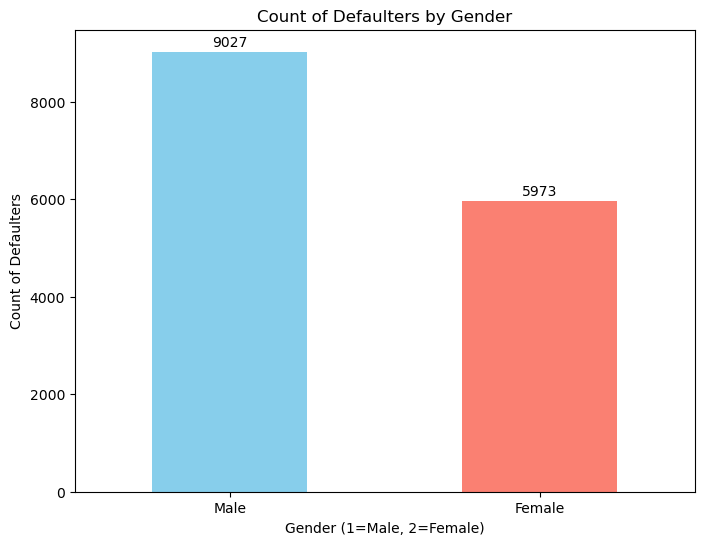

In [54]:
# Plotting
plt.figure(figsize=(8, 6))
defaulters_count_by_gender.plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Count of Defaulters by Gender')
plt.xlabel('Gender (1=Male, 2=Female)')
plt.ylabel('Count of Defaulters')
plt.xticks(ticks=[0, 1], labels=['Male', 'Female'], rotation=0)

# Display the count on top of each bar
for i, count in enumerate(defaulters_count_by_gender):
    plt.text(i, count + 100, str(count), ha='center')

plt.show()

Eventhough we can see there is a bigger count of male defaulters, we need to check the distribution over the whola population per gender

In [55]:
import numpy as np
# Calculate the proportion of defaulters by gender
defaulters_by_gender = final_data.groupby('SEX_Male')['DEFAULT_JULY'].mean() * 100  # Convert to percentages

In [56]:
# Set up positions for the bars
ind = np.arange(2)  # the x locations for the groups
width = 0.35  # the width of the bars

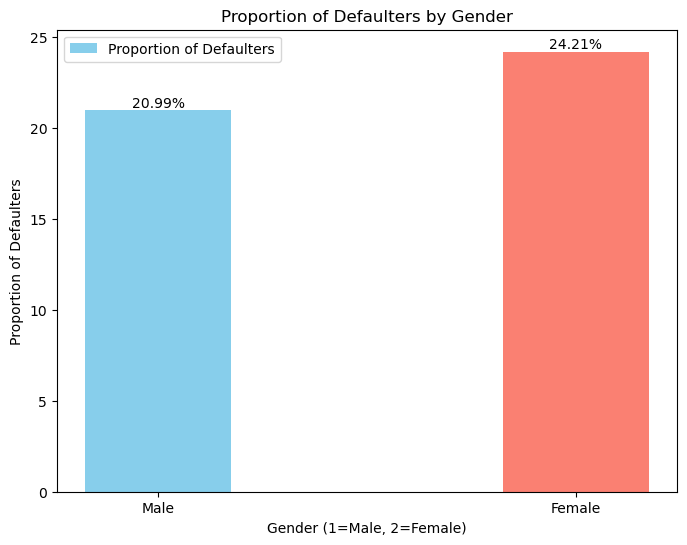

In [57]:
# Plotting
fig, ax = plt.subplots(figsize=(8, 6))
bars = ax.bar(ind, defaulters_by_gender, width, label='Proportion of Defaulters', color=['skyblue', 'salmon'])

# Attach percentages to the bars
for bar in bars:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.2f}%', ha='center', va='bottom')

# Labels and title
ax.set_xlabel('Gender (1=Male, 2=Female)')
ax.set_ylabel('Proportion of Defaulters')
ax.set_title('Proportion of Defaulters by Gender')
ax.set_xticks(ind)
ax.set_xticklabels(['Male', 'Female'])
ax.legend()

plt.show()

- Male Defaulters:
  The count of defaulters among males is notably lower, reaching approximately 9,000 individuals, but it only represents a 21 percent of the male population. This indicates that a shorter proportion of males in the dataset have defaulted on their credit card payments.
- Female Defaulters:
  In contrast, the count of defaulters among females is around 6,000 individuals, representing a 24 percent of the female population. While still a significant number, it is higher compared to the count of male defaulters.

The data suggests that there is some gender-based disparity in credit card default rates, with a higher proportion of female users defaulting compared to male users.

### Insight 3: Relationship between Credit Limit and Default Rate

In [58]:
# Define credit limit ranges
credit_limit_ranges = ['0-50K', '50K-100K', '100K-200K', '200K-300K', '300K+']

In [59]:
# Bin the 'LIMIT_BAL' into the defined ranges
final_data['LIMIT_BAL_RANGE'] = pd.cut(final_data['LIMIT_BAL'], bins=[0, 50000, 100000, 200000, 300000, float('inf')],
                                       labels=credit_limit_ranges, include_lowest=True)

In [60]:
# Calculate default rate for each credit limit range
default_rate_by_limit = final_data.groupby('LIMIT_BAL_RANGE')['DEFAULT_JULY'].mean()

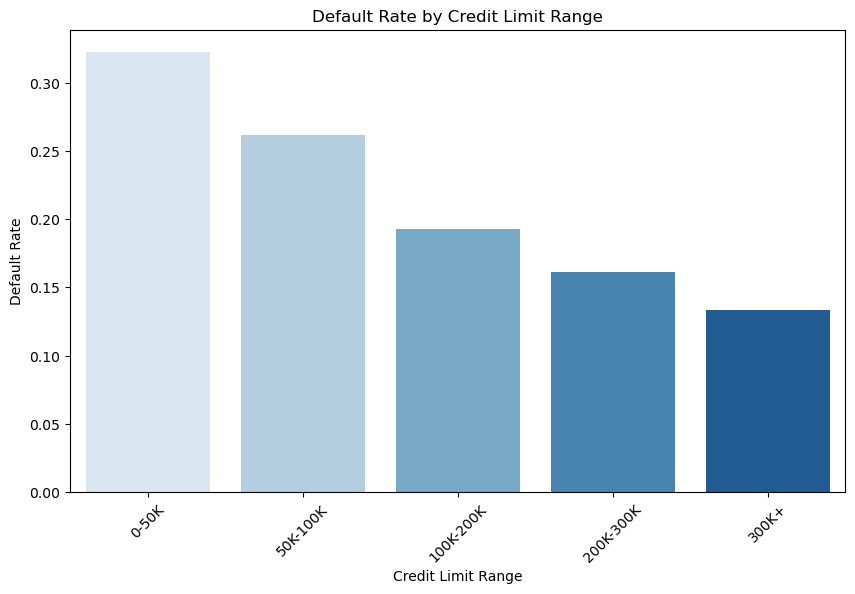

In [61]:
# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x=default_rate_by_limit.index, y=default_rate_by_limit.values, palette='Blues')
plt.title('Default Rate by Credit Limit Range')
plt.xlabel('Credit Limit Range')
plt.ylabel('Default Rate')
plt.xticks(rotation=45)
plt.show()

The analysis explores the connection between credit limit ranges and the corresponding default rates within a dataset from a regional bank.

This insight underscores the importance of credit limit management in mitigating default risk. Lower credit limits tend to have higher default rates, potentially indicating financial strain or imprudent spending habits. Conversely, higher credit limits demonstrate a lower likelihood of default, suggesting better financial stability or responsible credit usage.

## **C. MACHINE LEARNING**

Build a machine learning model to estimate the probability of default.

/var/folders/yh/p4rrr5t91yv4c08dbp945w3c0000gn/T/ipykernel_2813/3065754399.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = final_data.corr()


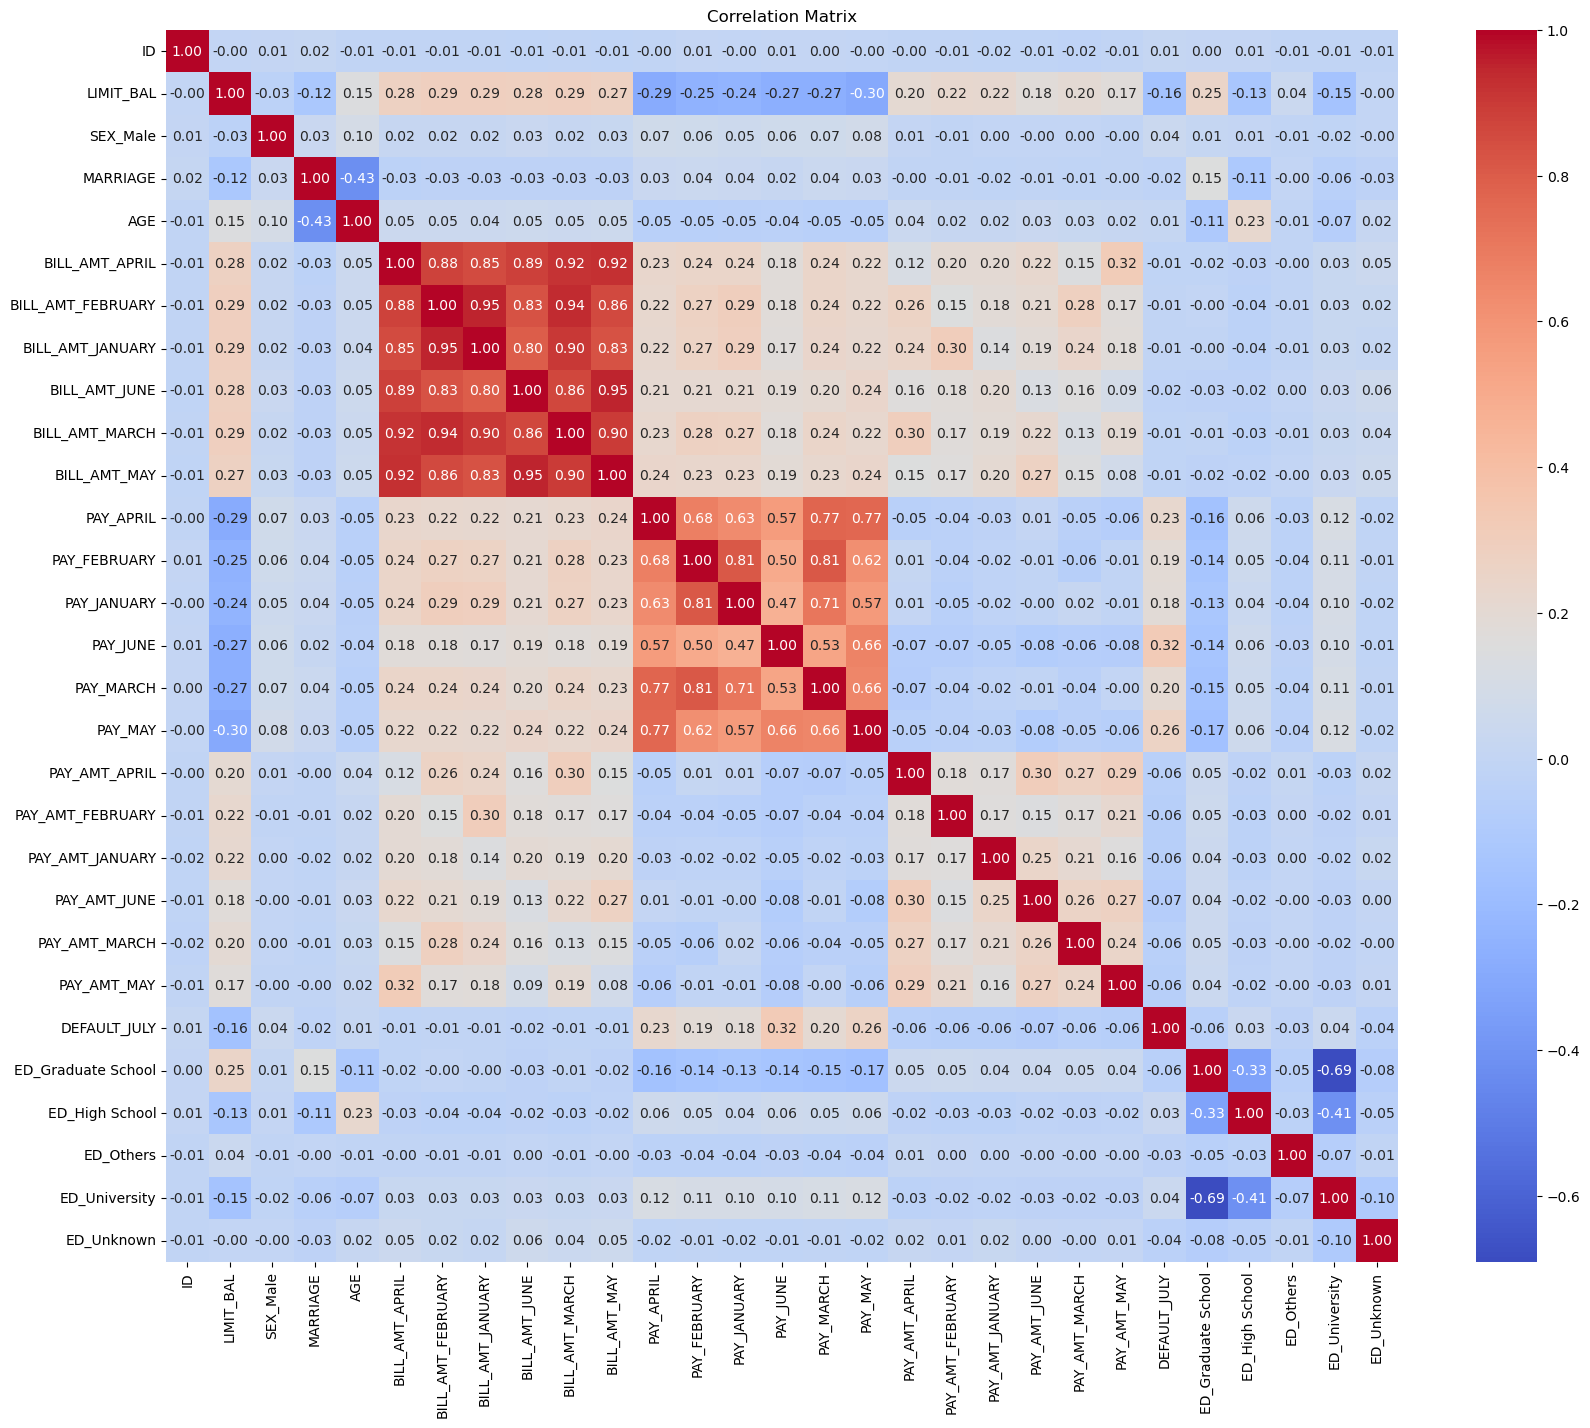

In [62]:
# Calculate the correlation matrix
correlation_matrix = final_data.corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(20, 16))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True, cbar=True)
plt.title('Correlation Matrix')
plt.show()

Comments after checking the correlations:

- The 'AGE_RANGE' column will be also removed, as we have the 'AGE' column.

- The column 'LIMIT_BAL_RANGE' will also be dropped as it is categorical and we have 'LIMIT_BAL'.

- The column 'EDUCATION' will also be dropped as it is categorical and we have the dummy columns divided by grades of education.

- There are some high values that will perhaps overfit the future model.
  This superfitial correlations are the 'BIlL_AMT_MONTH', 'PAY_AMT_STATUS' & 'PAY_MONTH'columns from **`train_series.csv`** what actually makes sense.
  High correlation among features, especially in the context of predictive modeling, can lead to multicollinearity and overfitting issues.
  Features related to bill amounts will be moved to a unified column 'AVG_BILL_AMOUNT'. Features related to payment amounts will also be moved to a unified column 'AVG_PAY_AMOUNT'. Features related to payment status will also be moved to a unified column 'AVG_PAY_STATUS'. This way, the model will avoid potential redundancy and multicollinearity and at the same time will take in count both the bills and the payments in a time frame aspects.

In [63]:
# Save the resulting CSV
final_data.to_csv('<García de Parada><Ignacio>_A_train.csv', index=False)

In [64]:
# Drop irrelevant or redundant columns
final_data.drop(['AGE_RANGE', 'LIMIT_BAL_RANGE', 'EDUCATION'], axis=1, inplace=True)

In [65]:
# Select the bill amount columns
bill_amount_cols = ['BILL_AMT_JANUARY', 'BILL_AMT_FEBRUARY', 'BILL_AMT_MARCH',
                    'BILL_AMT_APRIL', 'BILL_AMT_MAY', 'BILL_AMT_JUNE']

In [66]:
# Calculate the average bill amount for each individual
final_data['AVG_BILL_AMOUNT'] = final_data[bill_amount_cols].mean(axis=1)

In [67]:
# Drop the individual payment status features
final_data.drop(bill_amount_cols, axis=1, inplace=True)

In [68]:
# List of payment status features
payment_status_features = ['PAY_JANUARY', 'PAY_FEBRUARY', 'PAY_MARCH', 'PAY_APRIL', 'PAY_MAY', 'PAY_JUNE']

In [69]:
# Calculate the average payment status over the months
final_data['AVG_PAY_STATUS'] = final_data[payment_status_features].mean(axis=1)

In [70]:
final_data.drop(columns=payment_status_features, inplace=True, axis=1)

In [71]:
# Select the bill amount columns
pay_amount_cols = ['PAY_AMT_JANUARY', 'PAY_AMT_FEBRUARY', 'PAY_AMT_MARCH',
                    'PAY_AMT_APRIL', 'PAY_AMT_MAY', 'PAY_AMT_JUNE']

In [72]:
# Calculate the average bill amount for each individual
final_data['AVG_PAY_AMOUNT'] = final_data[pay_amount_cols].mean(axis=1)

In [73]:
# Drop the individual payment status features
final_data.drop(pay_amount_cols, axis=1, inplace=True)

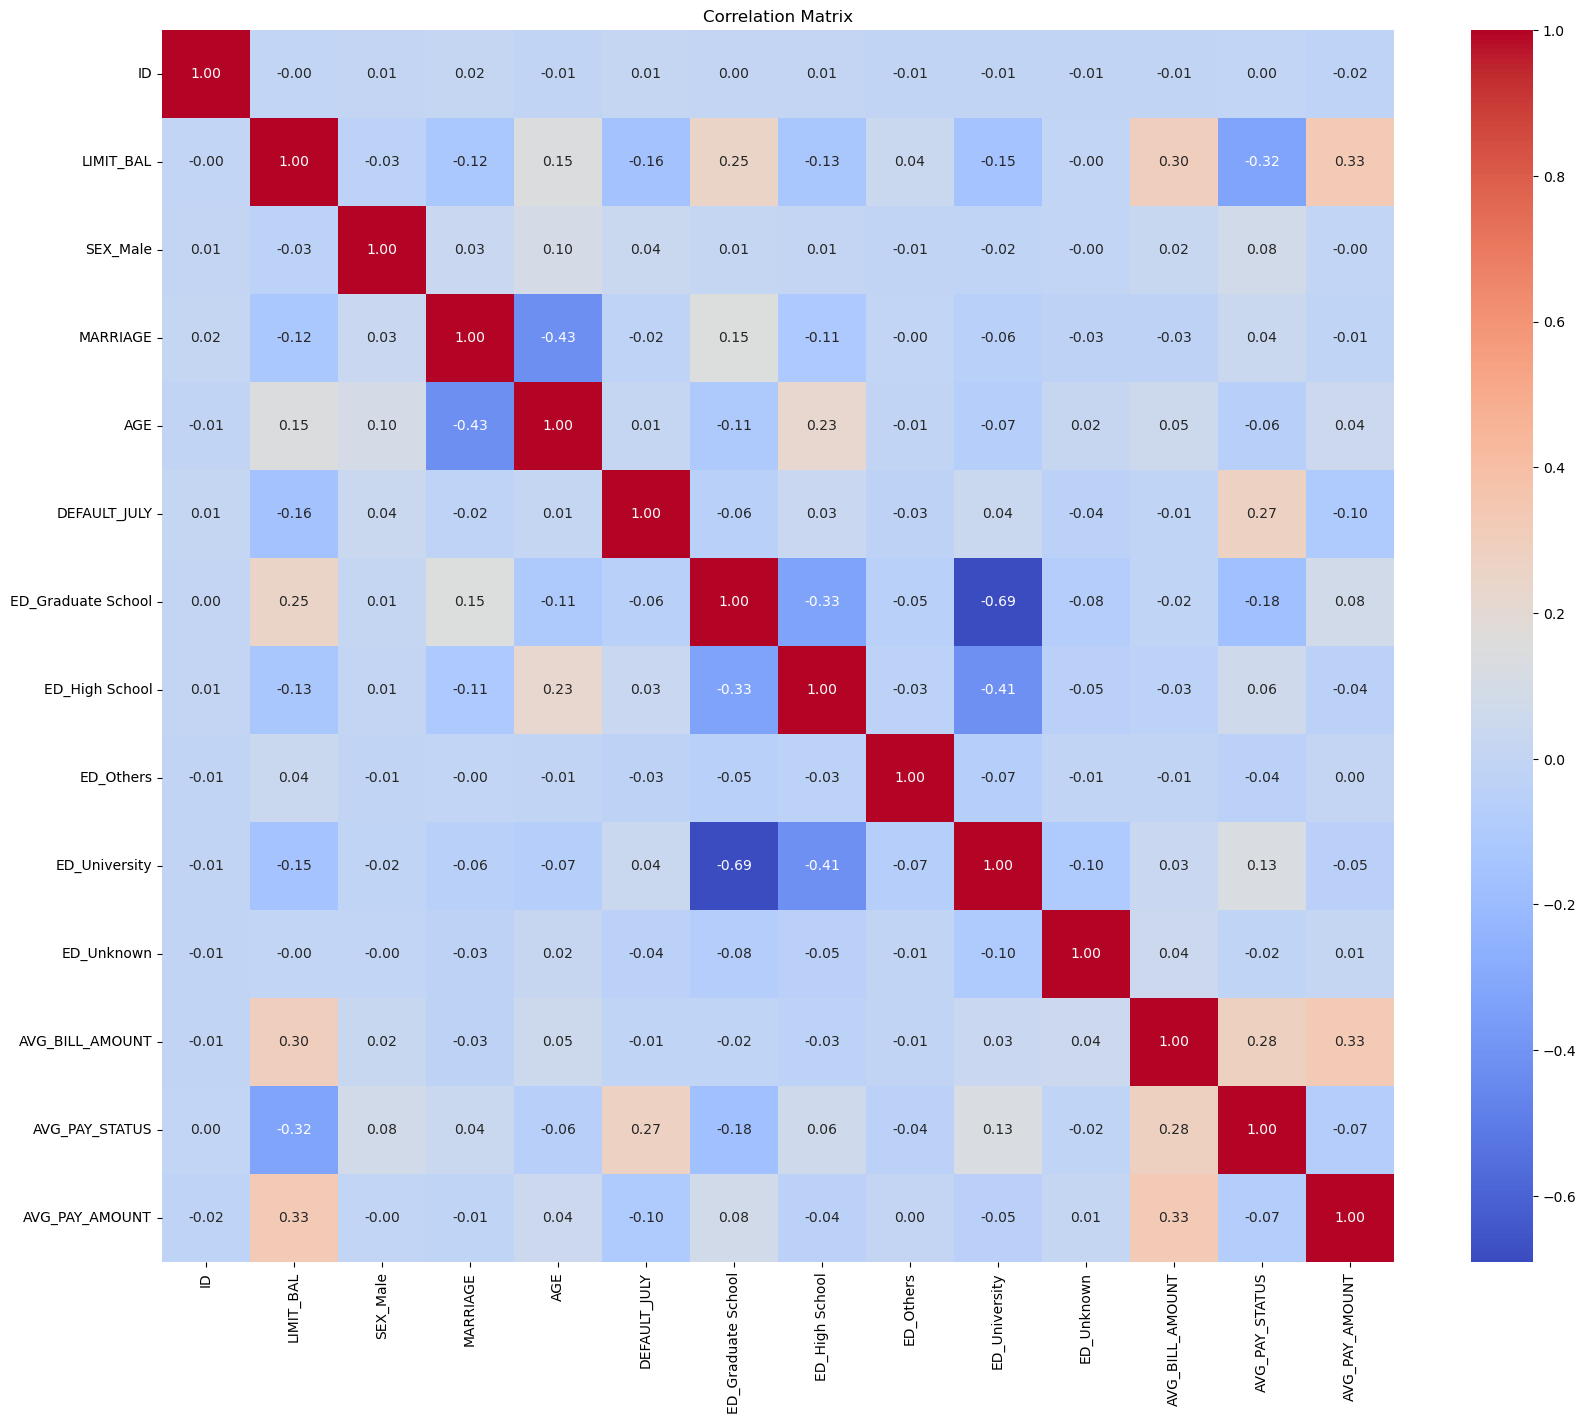

In [74]:
# Calculate the correlation matrix
correlation_matrix = final_data.corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(20, 16))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True, cbar=True)
plt.title('Correlation Matrix')
plt.show()

In [75]:
final_data.head()

,ID,LIMIT_BAL,SEX_Male,MARRIAGE,AGE,DEFAULT_JULY,ED_Graduate School,ED_High School,ED_Others,ED_University,ED_Unknown,AVG_BILL_AMOUNT,AVG_PAY_STATUS,AVG_PAY_AMOUNT
0,15936,140000.0,0,1,39,0,1,0,0,0,0,9561.666667,-0.500000,7441.166667
1,15248,90000.0,0,1,49,1,0,0,0,1,0,1931.333333,-1.000000,2523.000000
2,27163,150000.0,0,1,37,0,1,0,0,0,0,1762.500000,-0.666667,931.833333
3,13955,160000.0,1,1,38,0,0,1,0,0,0,17635.333333,0.000000,2260.000000
4,23604,360000.0,1,1,28,0,0,0,0,1,0,833.333333,-0.500000,416.666667


In [76]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15000 entries, 0 to 14999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  15000 non-null  int64  
 1   LIMIT_BAL           15000 non-null  float64
 2   SEX_Male            15000 non-null  uint8  
 3   MARRIAGE            15000 non-null  int64  
 4   AGE                 15000 non-null  int64  
 5   DEFAULT_JULY        15000 non-null  int64  
 6   ED_Graduate School  15000 non-null  uint8  
 7   ED_High School      15000 non-null  uint8  
 8   ED_Others           15000 non-null  uint8  
 9   ED_University       15000 non-null  uint8  
 10  ED_Unknown          15000 non-null  uint8  
 11  AVG_BILL_AMOUNT     15000 non-null  float64
 12  AVG_PAY_STATUS      15000 non-null  float64
 13  AVG_PAY_AMOUNT      15000 non-null  float64
dtypes: float64(4), int64(4), uint8(6)
memory usage: 1.1 MB


In [77]:
# Save the resulting CSV
final_data.to_csv('<García de Parada><Ignacio>_A_train.csv', index=False)

### I have to apply the same preprocessing to the *test_data.csv* as the one applied to the *train_data.csv*

In [78]:
import pandas as pd

# Load test_data.csv
test_data = pd.read_csv('test_data.csv')

In [79]:
# Replace SEX codes with binary values
test_data['SEX'] = test_data['SEX'].apply(lambda x: 1 if x == 1 else 0)

In [80]:
# Rename the column to indicate the values (1=male, 0=female)
test_data = test_data.rename(columns={'SEX': 'SEX_Male'})
test_data['SEX_Male'] = test_data['SEX_Male'].astype('uint8')

In [81]:
# Combine categories 5 and 6 into one category (5). This is due to the fact we don`t know the difference between each other. Both are Unknown.
test_data['EDUCATION'] = test_data['EDUCATION'].replace(6, 5)

In [82]:
# Labels for the education categories
test_education_labels = ['Graduate School', 'University', 'High School', 'Others', 'Unknown']

In [83]:
# Map original EDUCATION codes to corresponding labels
test_education_labels = {
    1: 'Graduate School',
    2: 'University',
    3: 'High School',
    4: 'Others',
    5: 'Unknown'
}

In [84]:
# Replace EDUCATION codes with labels
test_data['EDUCATION'] = test_data['EDUCATION'].replace(test_education_labels)

In [85]:
# Create dummy columns for education categories
test_education_dummies = pd.get_dummies(test_data['EDUCATION'], prefix='ED', drop_first=False)

In [86]:
# Rename the dummy columns to match the desired labels
test_education_dummies = test_education_dummies.rename(columns=education_labels)

In [87]:
# Concatenate the dummy columns with the original dataframe
test_data = pd.concat([test_data, test_education_dummies], axis=1)
test_data.drop('ED_0', axis=1, inplace=True)

In [88]:
# Drop irrelevant or redundant columns
test_data.drop(['EDUCATION'], axis=1, inplace=True)

In [89]:
# Rename the columns to match the desired format (PAY_JANUARY, PAY_FEBRUARY, etc.)
pivoted_data.rename(columns={
    'PAY_JAN': 'PAY_JANUARY', 'PAY_FEB': 'PAY_FEBRUARY', 'PAY_MAR': 'PAY_MARCH',
    'PAY_APR': 'PAY_APRIL', 'PAY_MAY': 'PAY_MAY', 'PAY_JUN': 'PAY_JUNE',
    'BILL_AMT_JAN': 'BILL_AMT_JANUARY', 'BILL_AMT_FEB': 'BILL_AMT_FEBRUARY',
    'BILL_AMT_MAR': 'BILL_AMT_MARCH', 'BILL_AMT_APR': 'BILL_AMT_APRIL',
    'BILL_AMT_MAY': 'BILL_AMT_MAY', 'BILL_AMT_JUN': 'BILL_AMT_JUNE',
    'PAY_AMT_JAN': 'PAY_AMT_JANUARY', 'PAY_AMT_FEB': 'PAY_AMT_FEBRUARY',
    'PAY_AMT_MAR': 'PAY_AMT_MARCH', 'PAY_AMT_APR': 'PAY_AMT_APRIL',
    'PAY_AMT_MAY': 'PAY_AMT_MAY', 'PAY_AMT_JUN': 'PAY_AMT_JUNE'
}, inplace=True)

In [90]:
# Select the bill amount columns
test_bill_amount_cols = ['BILL_AMT_JANUARY', 'BILL_AMT_FEBRUARY', 'BILL_AMT_MARCH',
                    'BILL_AMT_APRIL', 'BILL_AMT_MAY', 'BILL_AMT_JUNE']

In [91]:
# Calculate the average bill amount for each individual
test_data['AVG_BILL_AMOUNT'] = test_data[test_bill_amount_cols].mean(axis=1)

In [92]:
# Drop the individual payment status features
test_data.drop(test_bill_amount_cols, axis=1, inplace=True)

In [93]:
# List of payment status features
test_payment_status_features = ['PAY_JANUARY', 'PAY_FEBRUARY', 'PAY_MARCH', 'PAY_APRIL', 'PAY_MAY', 'PAY_JUNE']

In [94]:
# Calculate the average payment status over the months
test_data['AVG_PAY_STATUS'] = test_data[test_payment_status_features].mean(axis=1)
test_data.drop(columns=test_payment_status_features, inplace=True, axis=1)

In [95]:
# Select the bill amount columns
test_pay_amount_cols = ['PAY_AMT_JANUARY', 'PAY_AMT_FEBRUARY', 'PAY_AMT_MARCH',
                    'PAY_AMT_APRIL', 'PAY_AMT_MAY', 'PAY_AMT_JUNE']

In [96]:
# Calculate the average bill amount for each individual
test_data['AVG_PAY_AMOUNT'] = test_data[test_pay_amount_cols].mean(axis=1)

In [97]:
# Drop the individual payment status features
test_data.drop(test_pay_amount_cols, axis=1, inplace=True)

In [98]:
# Save the resulting CSV
test_data.to_csv('<García de Parada><Ignacio>_A_test.csv', index=False)

#### As *'test_data'* is already preprocessed, we will begin to build the ML Model

In [99]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

In [100]:
# Load the final data
train_data = final_data
test_data = test_data

In [101]:
# Separate features and target in the training data
X_train = train_data.drop('DEFAULT_JULY', axis=1)
y_train = train_data['DEFAULT_JULY']

### XGBOOST

In [102]:
# Define the hyperparameters and their respective values for searching
param_grid = {
    'max_depth': [3, 6, 9],
    'learning_rate': [0.1, 0.01, 0.001],
    'n_estimators': [100, 300, 500],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0]
}

In [103]:
# Initialize the XGBoost classifier
xgb_model = xgb.XGBClassifier(random_state=42)

In [104]:
# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=3, scoring='roc_auc')

In [105]:
# Use 'final_data' for training
X_train = train_data.drop('DEFAULT_JULY', axis=1)
y_train = train_data['DEFAULT_JULY']

In [106]:
# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=42, ...),
             param_grid={'colsample_bytree': [0.8, 0.9, 1.0],
                         'learning_rate': [0.1, 0.01, 0.001],
                         'max_depth': [3, 6, 9],
                         'n_estimators': [100, 300, 500],
                         'subsample': [0.8, 0.9, 1.0]},
             scoring='roc_auc')

In [134]:
# Get the best parameters and the best model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

In [135]:
# Calculate ROC-AUC score for the best model
y_test_prob = best_model.predict_proba(test_data.drop('DEFAULT_JULY', axis=1))[:, 1]
roc_auc = roc_auc_score(test_data['DEFAULT_JULY'], y_test_prob)
print('Test ROC-AUC:', roc_auc)

Test ROC-AUC: 0.7656124054439484


### When XGBoost gets the best ROC-AUC score, move to make new (soft) predictions over the 'submission_features.csv', applying a preprocessing as in the *train_data*.

In [136]:
# Load the submission features data
submission_df = pd.read_csv('submission_features.csv')

In [137]:
submission_df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_JUNE,PAY_MAY,PAY_APRIL,PAY_MARCH,...,BILL_AMT_APRIL,BILL_AMT_MARCH,BILL_AMT_FEBRUARY,BILL_AMT_JANUARY,PAY_AMT_JUNE,PAY_AMT_MAY,PAY_AMT_APRIL,PAY_AMT_MARCH,PAY_AMT_FEBRUARY,PAY_AMT_JANUARY
0,3644,130000.0,2,1,1,46,0,0,0,0,...,18932.0,22001.0,3403.0,3859.0,1593.0,3000.0,4000.0,0.0,3860.0,249.0
1,15370,120000.0,2,5,1,57,0,0,0,0,...,98109.0,74387.0,75237.0,78967.0,5000.0,5007.0,5000.0,5000.0,5000.0,5000.0
2,15570,500000.0,1,1,1,55,3,2,2,2,...,4957.0,4957.0,4957.0,4957.0,0.0,0.0,0.0,0.0,0.0,0.0
3,16113,60000.0,1,2,2,28,2,2,2,0,...,59892.0,60228.0,57969.0,55220.0,2800.0,0.0,3000.0,3000.0,3000.0,23000.0
4,14220,220000.0,2,1,2,36,0,0,2,0,...,1522.0,5198.0,3974.0,-38.0,2190.0,1.0,3980.0,20.0,0.0,7762.0


In [138]:
# Replace SEX codes with binary values
submission_df['SEX'] = submission_df['SEX'].apply(lambda x: 1 if x == 1 else 0)

In [139]:
# Rename the column to indicate the values (1=male, 0=female)
submission_df = submission_df.rename(columns={'SEX': 'SEX_Male'})
submission_df['SEX_Male'] = submission_df['SEX_Male'].astype('uint8')

In [140]:
# Combine categories 5 and 6 into one category (5). This is due to the fact we don`t know the difference between each other. Both are Unknown.
submission_df['EDUCATION'] = submission_df['EDUCATION'].replace(6, 5)

In [141]:
# Labels for the education categories
s_education_labels = ['Graduate School', 'University', 'High School', 'Others', 'Unknown']

In [142]:
# Map original EDUCATION codes to corresponding labels
s_education_labels = {
    1: 'Graduate School',
    2: 'University',
    3: 'High School',
    4: 'Others',
    5: 'Unknown'
}

In [143]:
# Replace EDUCATION codes with labels
submission_df['EDUCATION'] = submission_df['EDUCATION'].replace(s_education_labels)

In [144]:
# Create dummy columns for education categories
s_education_dummies = pd.get_dummies(submission_df['EDUCATION'], prefix='ED', drop_first=False)

In [145]:
# Rename the dummy columns to match the desired labels
s_education_dummies = s_education_dummies.rename(columns=education_labels)

In [146]:
# Concatenate the dummy columns with the original dataframe
submission_df = pd.concat([submission_df, s_education_dummies], axis=1)
submission_df.drop('ED_0', axis=1, inplace=True)

In [147]:
# Drop irrelevant or redundant columns
submission_df.drop(['EDUCATION'], axis=1, inplace=True)

In [148]:
# Rename the columns to match the desired format (PAY_JANUARY, PAY_FEBRUARY, etc.)
pivoted_data.rename(columns={
    'PAY_JAN': 'PAY_JANUARY', 'PAY_FEB': 'PAY_FEBRUARY', 'PAY_MAR': 'PAY_MARCH',
    'PAY_APR': 'PAY_APRIL', 'PAY_MAY': 'PAY_MAY', 'PAY_JUN': 'PAY_JUNE',
    'BILL_AMT_JAN': 'BILL_AMT_JANUARY', 'BILL_AMT_FEB': 'BILL_AMT_FEBRUARY',
    'BILL_AMT_MAR': 'BILL_AMT_MARCH', 'BILL_AMT_APR': 'BILL_AMT_APRIL',
    'BILL_AMT_MAY': 'BILL_AMT_MAY', 'BILL_AMT_JUN': 'BILL_AMT_JUNE',
    'PAY_AMT_JAN': 'PAY_AMT_JANUARY', 'PAY_AMT_FEB': 'PAY_AMT_FEBRUARY',
    'PAY_AMT_MAR': 'PAY_AMT_MARCH', 'PAY_AMT_APR': 'PAY_AMT_APRIL',
    'PAY_AMT_MAY': 'PAY_AMT_MAY', 'PAY_AMT_JUN': 'PAY_AMT_JUNE'
}, inplace=True)

In [149]:
# Select the bill amount columns
s_bill_amount_cols = ['BILL_AMT_JANUARY','BILL_AMT_FEBRUARY', 'BILL_AMT_MARCH',
                    'BILL_AMT_APRIL','BILL_AMT_MAY','BILL_AMT_JUNE']

In [150]:
# Calculate the average payment status over the months
submission_df['AVG_BILL_AMOUNT'] = submission_df[s_bill_amount_cols].mean(axis=1)
submission_df.drop(columns=s_bill_amount_cols, inplace=True, axis=1)

In [151]:
# List of payment status features
s_pay_status_features = ['PAY_JANUARY', 'PAY_FEBRUARY', 'PAY_MARCH', 'PAY_APRIL', 'PAY_MAY', 'PAY_JUNE']

In [152]:
# Calculate the average payment status over the months
submission_df['AVG_PAY_STATUS'] = submission_df[s_pay_status_features].mean(axis=1)
submission_df.drop(columns=s_pay_status_features, inplace=True, axis=1)

In [153]:
# Select the pay amount columns
s_pay_amount_cols = ['PAY_AMT_JANUARY', 'PAY_AMT_FEBRUARY', 'PAY_AMT_MARCH',
                    'PAY_AMT_APRIL', 'PAY_AMT_MAY', 'PAY_AMT_JUNE']

In [154]:
# Calculate the average bill amount for each individual
submission_df['AVG_PAY_AMOUNT'] = submission_df[s_pay_amount_cols].mean(axis=1)

In [155]:
# Drop the individual payment status features
submission_df.drop(s_pay_amount_cols, axis=1, inplace=True)

In [156]:
# Save the resulting CSV
submission_df.to_csv('<García de Parada><Ignacio>_A_submission.csv', index=False)

In [157]:
# Use the trained XGBoost model to predict probabilities for class 1
submission_probabilities = best_model.predict_proba(submission_df)[:, 1]

In [158]:
# Create a DataFrame with ID and DEFAULT JULY columns
submission_df = pd.DataFrame({'ID': submission_df['ID'], 'DEFAULT_JULY': submission_probabilities})

In [159]:
# Save the predictions to a CSV file
submission_df.to_csv('submission_predictions.csv', index=False)

Now the bank wants to optimize the decision-making process by establishing the optimal threshold for the model in order to effectively take the decision about when to issue the credit and when not. So, taking into account the following numbers:

- A customer who received a loan but doesn't repay costs 5000$ to the bank
- A customer who receives a loan and repays, make a profit of 1000$ to the bank
- If the credit is not issued, then there is no profit or loss

#### What's the best threshold you should consider to maximize the profit?

In [167]:

# Use the best model for predictions
y_test_prob = best_model.predict_proba(test_data.drop('DEFAULT_JULY', axis=1))[:, 1]

# Constants provided
no_action = 0  # No action taken
profit = 1000  # Profit earned if the customer repays
cost = 5000  # Cost incurred if the customer defaults

def calculate_profit(threshold, model, X_test, y_test):
    # Predict the probabilities of defaulting
    y_pred_proba = model.predict_proba(X_test)[:,1]
    
    # Predict class labels based on the given threshold
    y_pred = (y_pred_proba > threshold).astype(int)
    
    # Generate confusion matrix
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    
    # Calculate total profit
    total_profit = (tp * no_action) + (tn * profit) + (fp * no_action) + (fn * cost)
    
    return total_profit

# Generate a range of thresholds to evaluate
thresholds = np.linspace(0, 1, 1000)

# Initialize variables to store optimal threshold and maximum net profit
optimal_threshold = 0
max_net_profit = 0

# Iterate through each threshold and calculate net profit
for threshold in thresholds:
    # Calculate profit using the provided function
    net_profit = calculate_profit(threshold, best_model, test_data.drop('DEFAULT_JULY', axis=1), test_data['DEFAULT_JULY'])
    
    # Update optimal threshold and maximum net profit if needed
    if net_profit > max_net_profit:
        max_net_profit = net_profit
        optimal_threshold = threshold

# Store the optimal threshold in a JSON file
threshold_data = {"threshold": optimal_threshold}
with open('threshold.json', 'w') as json_file:
    json.dump(threshold_data, json_file)

print("Optimal Threshold:", optimal_threshold)
print("Maximum Net Profit:", max_net_profit)

Optimal Threshold: 0.6106106106106106
Maximum Net Profit: 14912000


- Optimal Threshold (0.6106106106106106):

  The optimal threshold is the classification probability above which a customer is predicted to default on a loan.
  In a binary classification problem like this, predictions are made by comparing the predicted probabilities (from the model) with this threshold. If the predicted probability of default for a customer is greater than or equal to this threshold, they are predicted to default; otherwise, they are predicted to repay the loan.
  The optimal threshold is determined based on the net profit calculation, aiming to maximize the overall profit for the bank.

- Maximum Net Profit (14912000):

  This is the maximum net profit achieved by the model at the optimal threshold.
  Net profit is calculated based on the number of true positives (TP), true negatives (TN), false positives (FP), and false negatives (FN) using the provided cost and profit information.
  The net profit is the sum of the profits generated from true positives (profit from customers who repay), true negatives (no action, no profit/loss), false positives (cost of customers predicted to repay but actually defaulted), and false negatives (cost of customers predicted to default but actually repaid).
  The model aims to find the threshold that maximizes this net profit.

In [448]:
import json

# The optimized threshold
optimized_threshold = 0.6106106106106106

# Create a dictionary to store the threshold
threshold_data = {
    "optimized_threshold": optimized_threshold
}

# Path to the threshold JSON file
json_file_path = 'threshold.json'

# Write the threshold data to the JSON file
with open(json_file_path, 'w') as json_file:
    json.dump(threshold_data, json_file)

print("Optimized threshold saved to threshold.json.")

Optimized threshold saved to threshold.json.
